## Main content

In [4]:
pip install pandas scikit-learn matplotlib graphviz seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install ucimlrepo


SyntaxError: invalid syntax (3614874313.py, line 2)

In [8]:
pip install graphviz


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Đã lưu dữ liệu thành file heart_disease.csv
Đã lưu cây quyết định với tỷ lệ train/test = 40/60
Đã lưu cây quyết định với tỷ lệ train/test = 60/40
Đã lưu cây quyết định với tỷ lệ train/test = 80/20
Đã lưu cây quyết định với tỷ lệ train/test = 90/10


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16020\3830191455.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_trains[i], ax=axes[i+1], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16020\3830191455.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_tests[i], ax=axes[i+1], palette="Reds", alpha=0.6)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16020\3830191455.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_trains[i], ax=axes[i+1], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16020\38

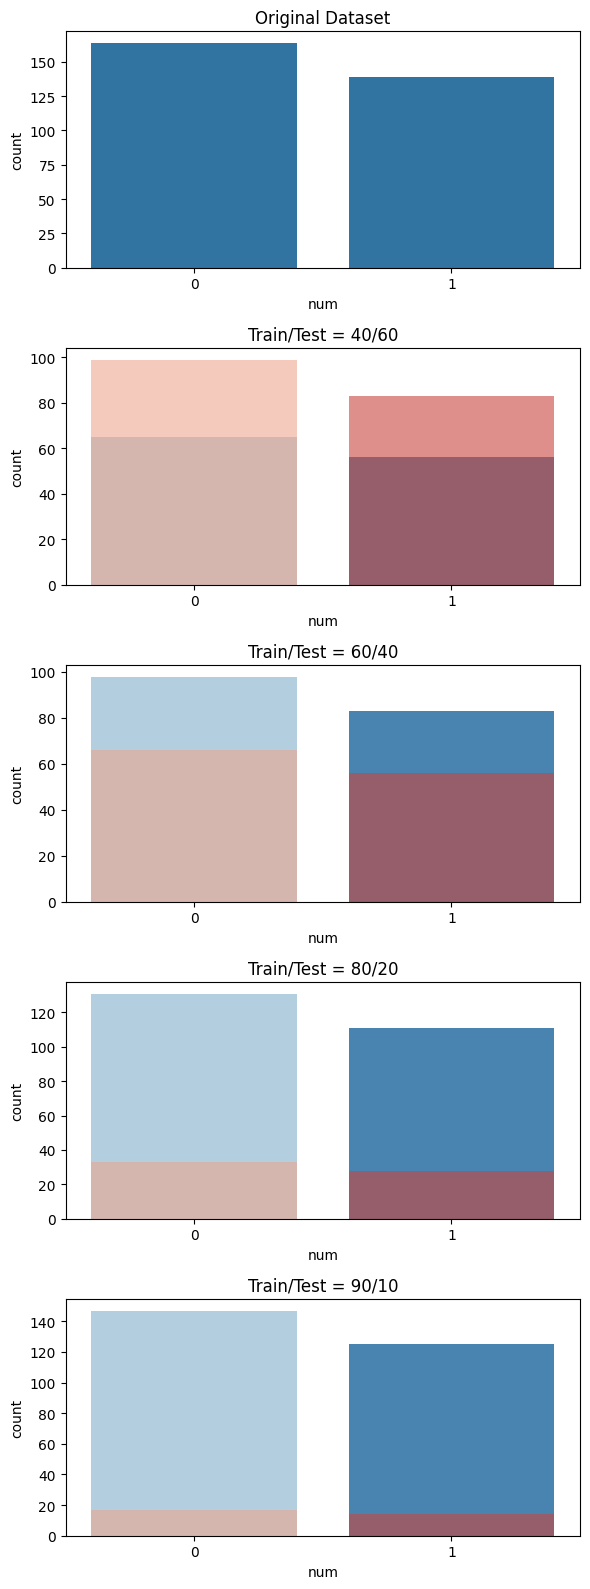

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Tải dữ liệu UCI Heart Disease từ ucimlrepo
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.squeeze()  # Loại bỏ cột đơn nếu tồn tại

# Kết hợp lại thành một DataFrame đầy đủ
df = pd.concat([X, y.rename("target")], axis=1)

# Lưu ra file CSV
df.to_csv("heart_disease.csv", index=False)

print("Đã lưu dữ liệu thành file heart_disease.csv")
# Chuyển y thành nhị phân: 0 = không bệnh, 1 = có bệnh
y_binary = y.copy()
y_binary[y_binary > 0] = 1

# Hàm vẽ phân bố lớp
def plot_distribution(y_all, y_trains, y_tests, ratios):
    fig, axes = plt.subplots(len(ratios)+1, 1, figsize=(6, 4*len(ratios)))

    sns.countplot(x=y_all, ax=axes[0])
    axes[0].set_title("Original Dataset")

    for i, ratio in enumerate(ratios):
        sns.countplot(x=y_trains[i], ax=axes[i+1], palette="Blues")
        sns.countplot(x=y_tests[i], ax=axes[i+1], palette="Reds", alpha=0.6)
        axes[i+1].set_title(f"Train/Test = {round(ratio*100)}/{round((1-ratio)*100)}")

    plt.tight_layout()
    plt.show()

# Các tỉ lệ chia train/test
ratios = [0.4, 0.6, 0.8, 0.9]

y_trains, y_tests = [], []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, train_size=ratio, stratify=y_binary, shuffle=True, random_state=42)

    y_trains.append(y_train)
    y_tests.append(y_test)

    # Huấn luyện cây quyết định
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)

    # Trực quan hóa cây
    dot_data = export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['No HD', 'HD'],
                                filled=True, rounded=True,
                                special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(f"decision_tree_{int(ratio*100)}", format='png', cleanup=True)
    print(f"Đã lưu cây quyết định với tỷ lệ train/test = {round(ratio*100)}/{round((1-ratio)*100)}")

# Vẽ phân bố lớp
plot_distribution(y_binary, y_trains, y_tests, ratios)



==== Classification Report (Train/Test = 40/60) ====
              precision    recall  f1-score   support

       No HD       0.80      0.68      0.73        99
          HD       0.67      0.80      0.73        83

    accuracy                           0.73       182
   macro avg       0.74      0.74      0.73       182
weighted avg       0.74      0.73      0.73       182



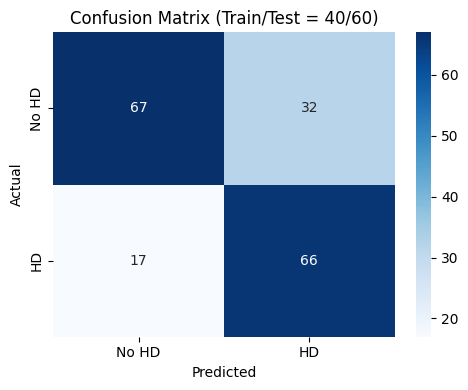


==== Classification Report (Train/Test = 60/40) ====
              precision    recall  f1-score   support

       No HD       0.79      0.74      0.77        66
          HD       0.72      0.77      0.74        56

    accuracy                           0.75       122
   macro avg       0.75      0.76      0.75       122
weighted avg       0.76      0.75      0.75       122



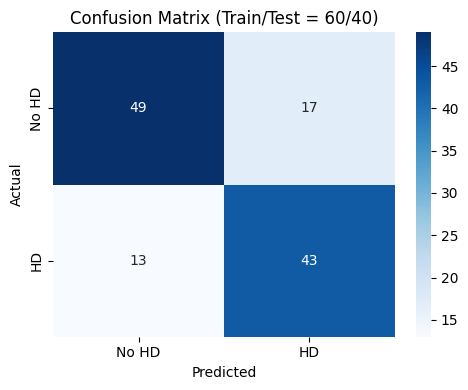


==== Classification Report (Train/Test = 80/20) ====
              precision    recall  f1-score   support

       No HD       0.88      0.67      0.76        33
          HD       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



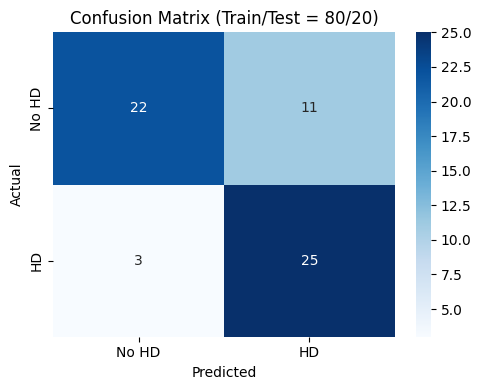


==== Classification Report (Train/Test = 90/10) ====
              precision    recall  f1-score   support

       No HD       0.91      0.59      0.71        17
          HD       0.65      0.93      0.76        14

    accuracy                           0.74        31
   macro avg       0.78      0.76      0.74        31
weighted avg       0.79      0.74      0.74        31



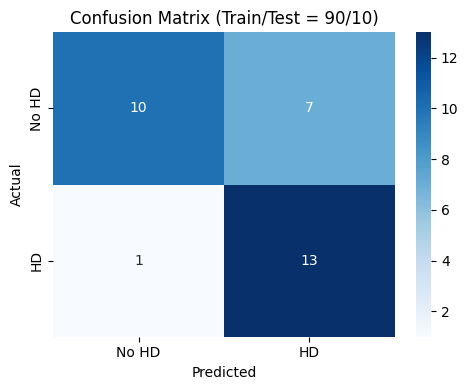

In [2]:
from sklearn.metrics import classification_report, confusion_matrix

for ratio in ratios:
    # Chia lại dữ liệu với y_binary (phân lớp nhị phân)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, train_size=ratio, stratify=y_binary, shuffle=True, random_state=42)

    # Huấn luyện mô hình cây quyết định
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)

    # Dự đoán trên tập test
    y_pred = clf.predict(X_test)

    # In báo cáo phân loại
    print(f"\n==== Classification Report (Train/Test = {round(ratio*100)}/{round((1-ratio)*100)}) ====")
    print(classification_report(y_test, y_pred, target_names=['No HD', 'HD']))

    # Tính ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Train/Test = {round(ratio*100)}/{round((1-ratio)*100)})')
    plt.tight_layout()
    plt.show()

Saved decision tree visualization for max_depth=full
Saved decision tree visualization for max_depth=2
Saved decision tree visualization for max_depth=3
Saved decision tree visualization for max_depth=4
Saved decision tree visualization for max_depth=5
Saved decision tree visualization for max_depth=6
Saved decision tree visualization for max_depth=7

Accuracy scores for different max_depth values:
Max Depth	Accuracy
Full Tree 	77.05%
2         	77.05%
3         	78.69%
4         	78.69%
5         	80.33%
6         	70.49%
7         	68.85%


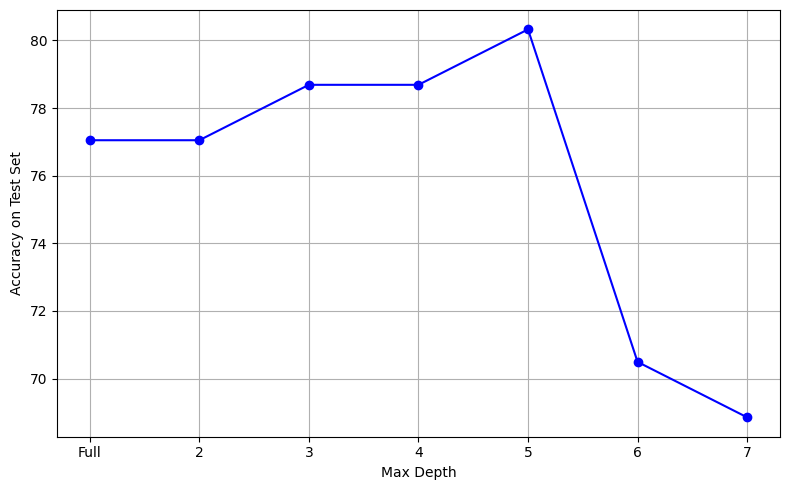

In [3]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Chia dữ liệu 80/20 với y_binary
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, train_size=0.8, stratify=y_binary, shuffle=True, random_state=42)

max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Trực quan hóa cây
    dot_data = export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=['No HD', 'HD'],
                               filled=True, rounded=True,
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    depth_label = "full" if depth is None else str(depth)
    graph.render(f"decision_tree_maxdepth_{depth_label}", format='png', cleanup=True)
    print(f"Saved decision tree visualization for max_depth={depth_label}")

# In bảng accuracy
print("\nAccuracy scores for different max_depth values:")
print("Max Depth\tAccuracy")
for depth, acc in zip(max_depth_values, accuracies):
    label = "Full Tree" if depth is None else str(depth)
    print(f"{label:<10}\t{acc * 100:.2f}%") 

# Vẽ biểu đồ
labels = ['Full' if d is None else str(d) for d in max_depth_values]

plt.figure(figsize=(8, 5))
# Chuyển accuracies sang phần trăm
accuracies_percent = [acc * 100 for acc in accuracies]
plt.plot(labels, accuracies_percent, marker='o', linestyle='-', color='blue')
plt.ylabel("Accuracy on Test Set (%)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy on Test Set")
plt.grid(True)
plt.tight_layout()
plt.show()
